In [27]:
# Modules to import the data set from Github
import os
import zipfile
import random
import pickle

import pandas as pd
import numpy as np
from tqdm import tqdm

# Modules for performance metrics
from sklearn.metrics import (
    f1_score, roc_auc_score, confusion_matrix, accuracy_score,
    precision_recall_curve, auc as pc_auc
)

# Modules for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Modules for feature transformation, scaling, and splitting data
from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split, learning_curve, StratifiedKFold, GridSearchCV, RandomizedSearchCV
)
from sklearn.preprocessing import MinMaxScaler

# Modules for linear classifier
from sklearn.linear_model import LogisticRegression

# Modules for kNN
from sklearn.neighbors import KNeighborsClassifier

# Modules for SVM
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from scipy.stats import loguniform, uniform
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import make_scorer


Accuracy: 0.8433734939759037
F1 Score: 0.43478260869565216
Sensitivity: 0.35714285714285715
Specificity: 0.9420289855072463


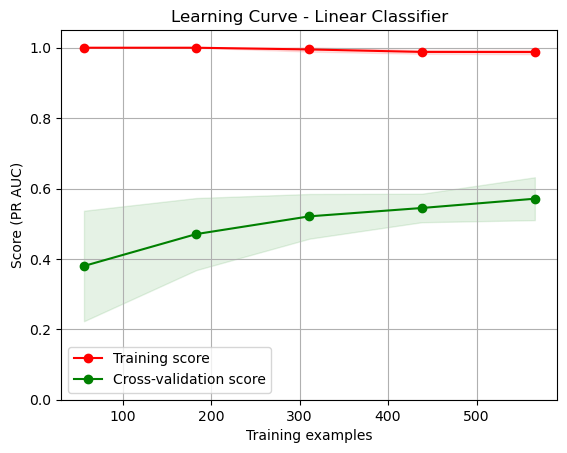

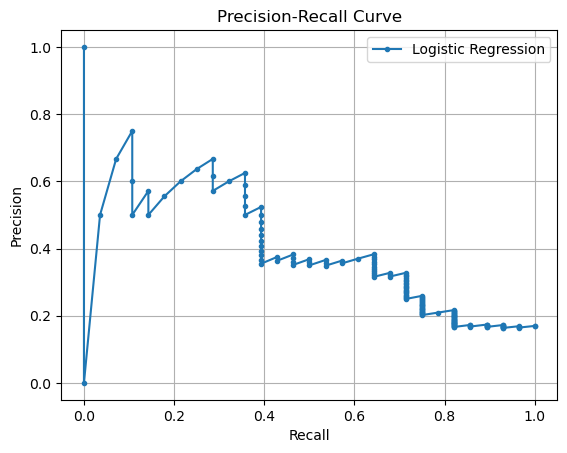

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
# Load data
data_path = r"E:\OneDrive\School\Technical Medicine\TM Jaar 1\Machine learning\TM10007_Machine_Learning_Group_4\TM\ecg_data.csv"
data = pd.read_csv(data_path, index_col=0)

# Splitting features and labels
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Creating a pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('pca', PCA(n_components=0.99)),
    ('classifier', LogisticRegression())
])

# Training the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate AUC
# auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
# print(f"AUC: {auc}")

def pr_auc_score(y_true, y_pred_proba):
    # Handle both 1D and 2D probability arrays
    if y_pred_proba.ndim == 2:
        y_pred_proba = y_pred_proba[:, 1]  # Get positive class probabilities
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    return pc_auc(recall, precision)

pr_auc_scorer = make_scorer(pr_auc_score)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=7),  scoring=pr_auc_scorer, n_jobs=-1, error_score='raise')  # This will show exactly what's causing NaNs


# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve - Linear Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score (PR AUC)")
plt.grid()

# Plot the mean and standard deviation for training and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim(0, 1.05)
plt.legend(loc="best")
plt.show()


# Get the predicted probabilities for the positive class
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()